# Counterfactual fairness

In [11]:
from mentat import *
import pandas as pd
import seaborn as sns

sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')
sns.set_style("ticks")

In [2]:
df = pd.read_csv("./data/law-data.zip")
df = df.drop(columns=["region_first", "Unnamed: 0"])
df.head()

,LSAT,UGPA,ZFYA,sander_index,first_pf,Amerindian,Asian,Black,Hispanic,Mexican,Other,Puertorican,White,male,female
0,39,3.1,-0.98,0.782738,1.0,0,0,0,0,0,0,0,1,0,1
1,36,3.0,0.09,0.735714,1.0,0,0,0,0,0,0,0,1,0,1
2,30,3.1,-0.35,0.670238,1.0,0,0,0,0,0,0,0,1,1,0
3,39,2.2,0.58,0.697024,1.0,0,0,0,1,0,0,0,0,1,0
4,37,3.4,-1.26,0.786310,1.0,0,0,0,0,0,0,0,1,0,1


In [3]:
A = [
    "Amerindian",
    "Asian",
    "Black",
    "Hispanic",
    "Mexican",
    "Other",
    "Puertorican",
    "White",
    "male",
    "female",
]

index_A = range(5, 15)

In [4]:
import org.apache.commons.math3.linear.RealMatrix
from org.apache.commons.math3.linear import MatrixUtils

NROWS = df.shape[0]
NCOLS = df.shape[1]
data = MatrixUtils.createRealMatrix(NROWS, NCOLS)

In [5]:
for i in range(NCOLS):
    data.setColumn(i, df.iloc[:, i].tolist())

In [6]:
counterfactualFairness = CounterfactualFairness(data)

In [7]:
epsilons = counterfactualFairness.calculateEpsilon(index_A, 0)

<AxesSubplot:ylabel='Count'>

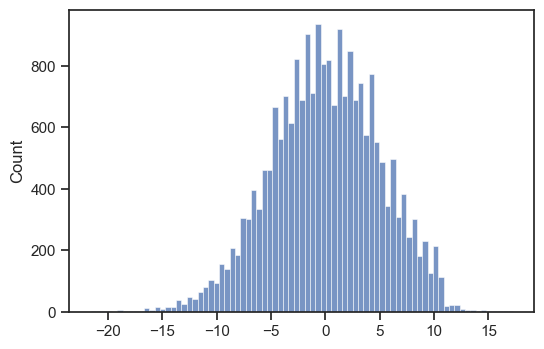

In [12]:
sns.histplot(epsilons.toArray())